# Prosper Loan Data Analysis
## by Fidel Wafula

## Introduction
The Prosper Loan dataset consists of 113,937 observations with 81 features. This is the data of loans applied by Prosper Marketplace customers in the period between 2009 and 2014. The features of the data include loan status, borrower Annual Percentage Rate (APR), borrower interest rate, loan term, employment status and Prosper rating among others.

## Preliminary Wrangling
This section explores the Prosper Loans dataset and performs various data cleaning operations. The resulting final output will be a cleaned dataset that will be ready for further analysis.


In [1]:
# import all the required packages:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load the dataset into pandas dataframe:
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# An overview of the loans dataset:
print(loans.shape)
print(loans.dtypes)
print(loans.head(10))

(113937, 81)
ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64


In [4]:
# Subset the dataset to extract variables of interest:
columns = ['ListingCreationDate',
'Term',
'LoanStatus',
'BorrowerAPR',
'BorrowerRate',
'ListingCategory (numeric)',
'Occupation',
'EmploymentStatus',
'DebtToIncomeRatio',
'IncomeRange',
'StatedMonthlyIncome',
'MonthlyLoanPayment',
'LoanOriginalAmount',
'LoanOriginationDate',
'ProsperRating (Alpha)',
'IsBorrowerHomeowner']
loans_sub = loans[columns]

In [5]:
# Confirm from the first 5 observations how the extracted dataset sits:
loans_sub.head()

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,LoanOriginationDate,ProsperRating (Alpha),IsBorrowerHomeowner
0,2007-08-26 19:09:29.263000000,36,Completed,0.16516,0.1580,0,Other,Self-employed,0.17,"$25,000-49,999",3083.333333,330.43,9425,2007-09-12 00:00:00,NaN,True
1,2014-02-27 08:28:07.900000000,36,Current,0.12016,0.0920,2,Professional,Employed,0.18,"$50,000-74,999",6125.000000,318.93,10000,2014-03-03 00:00:00,A,False
2,2007-01-05 15:00:47.090000000,36,Completed,0.28269,0.2750,0,Other,Not available,0.06,Not displayed,2083.333333,123.32,3001,2007-01-17 00:00:00,NaN,False
3,2012-10-22 11:02:35.010000000,36,Current,0.12528,0.0974,16,Skilled Labor,Employed,0.15,"$25,000-49,999",2875.000000,321.45,10000,2012-11-01 00:00:00,A,True
4,2013-09-14 18:38:39.097000000,36,Current,0.24614,0.2085,2,Executive,Employed,0.26,"$100,000+",9583.333333,563.97,15000,2013-09-20 00:00:00,D,True


In [6]:
# Summary of the loans data subset, including number of non-null entries: 
loans_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
ListingCreationDate          113937 non-null object
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ListingCategory (numeric)    113937 non-null int64
Occupation                   110349 non-null object
EmploymentStatus             111682 non-null object
DebtToIncomeRatio            105383 non-null float64
IncomeRange                  113937 non-null object
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
LoanOriginalAmount           113937 non-null int64
LoanOriginationDate          113937 non-null object
ProsperRating (Alpha)        84853 non-null object
IsBorrowerHomeowner          113937 non-null bool
dtypes: bool(1), float64(5), int64(3), object(7)
memory us

In [7]:
# Confirm existence of duplicated records:
loans_sub.loc[loans_sub.duplicated(),:]

,ListingCreationDate,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),Occupation,EmploymentStatus,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount,LoanOriginationDate,ProsperRating (Alpha),IsBorrowerHomeowner
9,2013-12-02 10:43:39.117000000,36,Current,0.07620,0.0629,7,Food Service,Employed,0.25,"$25,000-49,999",3333.333333,305.54,10000,2013-12-12 00:00:00,AA,True
999,2013-12-18 14:25:17.053000000,60,Current,0.17710,0.1535,1,Other,Employed,0.35,"$25,000-49,999",3750.000000,239.74,10000,2014-02-12 00:00:00,B,True
2539,2014-01-11 07:50:08.037000000,60,Current,0.14528,0.1224,1,Police Officer/Correction Officer,Employed,0.18,"$100,000+",10833.333333,782.81,35000,2014-03-11 00:00:00,B,True
4942,2013-09-26 09:35:36.317000000,36,Current,0.35356,0.3134,7,Laborer,Employed,0.07,"$50,000-74,999",4583.333333,172.76,4000,2013-10-01 00:00:00,HR,True
5812,2013-09-24 13:27:48.287000000,36,Current,0.24205,0.2045,1,NaN,Other,0.62,"$50,000-74,999",4166.666667,560.90,15000,2013-11-14 00:00:00,C,True
5971,2013-09-16 06:59:12.297000000,60,Current,0.18555,0.1620,1,Civil Service,Employed,0.26,"$25,000-49,999",3750.000000,244.24,10000,2013-10-21 00:00:00,B,False
6385,2013-12-10 13:39:07.220000000,36,Current,0.11563,0.0879,2,Professional,Employed,0.25,"$100,000+",14166.666667,317.02,10000,2014-01-21 00:00:00,A,True
7415,2013-08-21 07:25:22.360000000,60,Current,0.24589,0.2209,1,Clerical,Employed,0.25,"$50,000-74,999",5416.666667,276.70,10000,2013-11-01 00:00:00,C,True
7538,2013-10-24 13:21:31.607000000,36,Current,0.20524,0.1685,1,Other,Employed,0.18,"$100,000+",12916.666667,177.89,5000,2013-12-23 00:00:00,C,True
7555,2013-11-01 13:53:22,36,Current,0.12691,0.0990,1,Construction,Self-employed,NaN,"$25,000-49,999",3666.666667,322.20,10000,2013-12-18 00:00:00,A,False


In [8]:
# Extract only the non-duplicated records:
loans_sub = loans_sub.loc[~loans_sub.duplicated(),:]

# Confirm the shape of the new dataset with unique observations:
loans_sub.shape

(113066, 16)

In [9]:
# Check for the total number of null entries under each variable:
loans_sub.isnull().sum()

ListingCreationDate              0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ListingCategory (numeric)        0
Occupation                    3529
EmploymentStatus              2255
DebtToIncomeRatio             8472
IncomeRange                      0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
LoanOriginalAmount               0
LoanOriginationDate              0
ProsperRating (Alpha)        29084
IsBorrowerHomeowner              0
dtype: int64

In [10]:
# Fill null entries on the Occupation variable as 'Unspecified':
loans_sub['Occupation'] = loans_sub['Occupation'].fillna('Unspecified')

# Fill null values on the Debt to Income ratio column with the median:
loans_sub['DebtToIncomeRatio'] = loans_sub['DebtToIncomeRatio'].fillna(loans_sub['DebtToIncomeRatio'].median())

# Eliminate null entries in the Prosper Rating (Alpha) variable:
loans_sub = loans_sub.loc[loans_sub['ProsperRating (Alpha)'].notnull()]

In [11]:
# Amend Prosper Rating and Income ranges data types to be ordered categories:

# Store the correct variable orders in a dictionary:
ordered_dict = {'ProsperRating (Alpha)': ['AA', 'A', 'B', 'C', 'D', 'E','HR'],
                'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', 
                              '$50,000-74,999', '$75,000-99,999', '$100,000+']}

# Use for loop to assign each column to the proper order:
for key, value in ordered_dict.items():
    ordered_cat = pd.api.types.CategoricalDtype(categories=value, ordered=True)
    loans_sub[key] = loans_sub[key].astype(ordered_cat)

In [12]:
# Mapping listing category numeric value to its description:
numeric_list = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans', 
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle', 
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

loans_sub['ListingCategory'] = loans_sub['ListingCategory (numeric)'].map(numeric_list)

# Delete numeric listing categories to retain only the descriptive listings column:
loans_sub.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [13]:
# Amend the data types of datetime variables to appropriately:
loans_sub['LoanOriginationDate'] = pd.to_datetime(loans_sub['LoanOriginationDate'])
loans_sub['ListingCreationDate'] = pd.to_datetime(loans_sub['ListingCreationDate'])

# Extract date information from ListingCreationDate column
loans_sub['ListingDate'] = loans_sub['ListingCreationDate'].dt.date

# Extract year information from ListingCreationDate column
loans_sub['ListingYear'] = loans_sub['ListingCreationDate'].dt.year

# Extract month information from ListingCreationDate column
loans_sub['ListingMonth'] = loans_sub['ListingCreationDate'].dt.month

# Convert 'ListingDate' type from str to datetime 
loans_sub['ListingDate'] = pd.to_datetime(loans_sub['ListingDate'])

# Drop unused column
loans_sub.drop(['ListingCreationDate'], axis=1, inplace=True)

In [14]:
# Check for the month values in the listing month column:
loans_sub.ListingMonth.unique()

array([ 2, 10,  9, 12,  4,  5,  7,  8, 11,  1,  6,  3])

In [15]:
# Convert 'ListingMonth' type  from int64 to str:
loans_sub['ListingMonth'] = loans_sub['ListingMonth'].astype(str)

# Replace the numerical representation of months to text of the format 'mmm':
loans_sub['ListingMonth'] = loans_sub['ListingMonth'].replace(['1', '2','3','4','5','6','7','8', '9','10','11','12'], 
                                                              ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

# Confirm the implementation:
loans_sub['ListingMonth'].unique()

array(['Feb', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul', 'Aug', 'Nov',
       'Jan', 'Jun', 'Mar'], dtype=object)

In [16]:
# Amend the data type of listing month to ordered categorical:
ordered_months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec']
months_class = pd.api.types.CategoricalDtype(ordered = True, categories = ordered_months)
loans_sub['ListingMonth'] = loans_sub['ListingMonth'].astype(months_class)

# Confirm the implementation:
loans_sub['ListingMonth'].unique()

[Feb, Oct, Sept, Dec, Apr, ..., Aug, Nov, Jan, Jun, Mar]
Length: 12
Categories (12, object): [Jan < Feb < Mar < Apr ... Sept < Oct < Nov < Dec]

In [17]:
# Convert Listing Year data type from integer to string:
loans_sub['ListingYear'] = loans_sub['ListingYear'].astype(str)

In [18]:
# Check for duplicated records:
print('The total count of duplicated rows are: {}'.format(loans_sub.duplicated().sum()))

# Check for variables with null entries:
print(loans_sub.isnull().sum())

The total count of duplicated rows are: 1
Term                       0
LoanStatus                 0
BorrowerAPR                0
BorrowerRate               0
Occupation                 0
EmploymentStatus           0
DebtToIncomeRatio          0
IncomeRange              649
StatedMonthlyIncome        0
MonthlyLoanPayment         0
LoanOriginalAmount         0
LoanOriginationDate        0
ProsperRating (Alpha)      0
IsBorrowerHomeowner        0
ListingCategory            0
ListingDate                0
ListingYear                0
ListingMonth               0
dtype: int64


In [19]:
# Drop duplicates:
loans_sub = loans_sub.drop_duplicates()

# Drop null entry records:
loans_sub = loans_sub[~loans_sub.isnull()]

# Check for the size of the final cleaned dataset:
loans_sub.shape

(83981, 18)

### What is the structure of your dataset?
The original Prosper Loans dataset had 113,937 loans with 81 features, such as, credit grade, loan status, borrower APR among others. After performing preliminary data wrangling on the original data, the resulting clean data set had 83,981 rows and 18 columns. These variables are majorly either numeric or categorical.

### What is/are the main feature(s) of interest in your dataset?
The exploration of the Prosper Loan Data in the below sections ultimately aim to explore the below features:
- The loan application trends with comparison across diferent months of the year.
- Exploration of the credit ratings (Prosper Credit ratings) and how it interacts with borrower interest rate as well as borrower APR.
- Investigation into the various factors that affect the borrower interest rates.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
In order to achieve the exploration of the above main features I intend to explore the following crucial variables in this analysis:
- **ProsperRating (Alpha)**: The Prosper Rating assigned at the time the listing was created between AA - HR.
- **LoanStatus**: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue.
- **ListingCreationDate**: The date the listing was created.
- **BorrowerAPR**: The Borrower's Annual Percentage Rate (APR) for the loan.
- **BorrowerRate**: The Borrower's interest rate for this loan.
- **IncomeRange**: The income range of the borrower at the time the listing was created.
- **LoanOriginalAmount**: The origination amount of the loan.
- **Term**: The length of the loan expressed in months.
- **ListingCategory**: The category of the listing that the borrower selected when posting their listing.
- **IsBorrowerHomeowner**: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.

## Univariate Exploration
This section explores the distribution of various individual variables of interest in our dataset.

### 1. How are the Income Ranges distributed across the dataset?

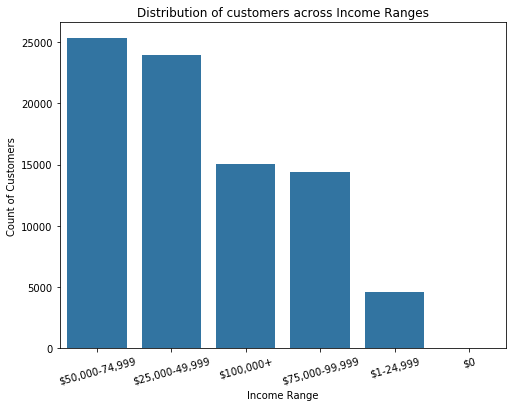

In [20]:
# Calculate the total count of loans with income ranges:
counts = loans_sub.IncomeRange.value_counts()

# Set default color as blue:
base_color = sb.color_palette()[0]

# Configure and plot count of customers under various income range categories:

plt.figure(figsize=[8,6])

sb.barplot(loans_sub.IncomeRange.value_counts().index.values, counts, color = base_color);
plt.xlabel('Income Range');
plt.ylabel('Count of Customers');
plt.title('Distribution of customers across Income Ranges')
plt.xticks(rotation=15);
plt.show()

**Observations:**

The majority of the customers income ranges are between USD 25,000 and USD 75,000, with the most falling in the USD 50,000 and USD 75,000 bucket. Less than 5,000 of the loan customers have income not exceeding USD 25,000.

### 2. How is the distribution of borrowers' Prosper Score Credit ratings?

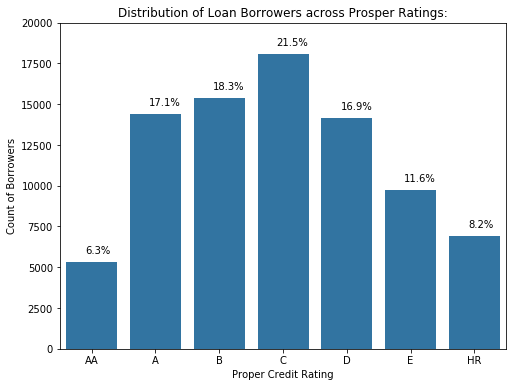

In [21]:
# Calculate counts of total loans and total loans per prosper rating:
counts = loans_sub['ProsperRating (Alpha)'].value_counts()
n_loans = loans_sub['ProsperRating (Alpha)'].value_counts().sum()

# Plot the the distribution of the loan customers across the prosper ratings:
plt.figure(figsize=[8,6])
sb.barplot(loans_sub['ProsperRating (Alpha)'].value_counts().index.values, counts, color = base_color);
plt.ylim(0, 20000)
plt.xlabel('Proper Credit Rating');
plt.ylabel('Count of Borrowers');
plt.title('Distribution of Loan Borrowers across Prosper Ratings:');

# Loop through the prosper rating categories to compute and display percentage:
for i in range(counts.shape[0]):
    count = counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    plt.text(i-0.1,count+700, pct_string, va = 'center');
plt.show()

**Observations:**

The Prosper Credit Ratings are arranged from 'AA' (lowest risk, lowest return) to 'HR' (highest risk, highest return). The above plot indicates that 'C' is the rating with the highest number of borrowers (21.6%), while 'AA' has the least number (6.3%).

### 3. What loan terms are most preferred by the borrowers?

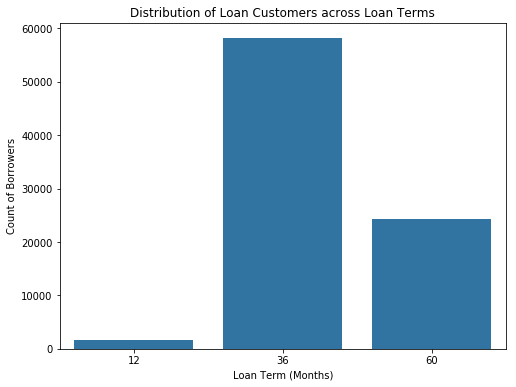

In [22]:
# Calculate total counts per individual loan term:
counts = loans_sub['Term'].value_counts()

# Plot the distribution of loan customers across different loan terms:
plt.figure(figsize=[8,6])
sb.barplot(loans_sub['Term'].value_counts().index.values, counts, color = base_color);
plt.xlabel('Loan Term (Months)');
plt.ylabel('Count of Borrowers');
plt.title('Distribution of Loan Customers across Loan Terms');
plt.show()

**Observations:**

There are three categories of the loan terms (1 year - short term, 2 years - medium term and 3 years - long term). Medium term loans are the most preferred, followed by long term loans. Short term loans are rarely taken by the borrowers.

### 4. How is the distribution of the borrowers' Stated Monthly Incomes?

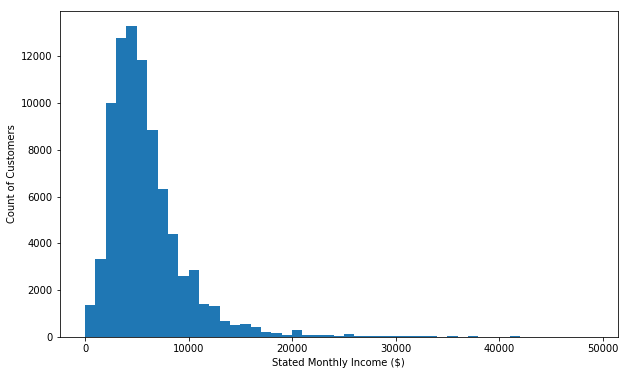

In [23]:
# Set the bins and bin size:
bins_incomes = np.arange(0, 50000, 1000)

# Plot the histogram of stated monthly incomes:
plt.figure(figsize=[10,6])
plt.hist(data = loans_sub, x = 'StatedMonthlyIncome', bins=bins_incomes);
plt.xlabel('Stated Monthly Income ($)');
plt.ylabel('Count of Customers');

**Observations:**

The distribution of the borrowers' stated monthly incomes is skewed to the right. Majority of the borrowers stated monthly incomes are up to USD 20,000, with the highest number of stating incomes of below USD 10,000. Also, there are few borrowers with stated monthly income greater that USD 30,000.

### 5. How does the Prosper's loan book repayments performance sits?

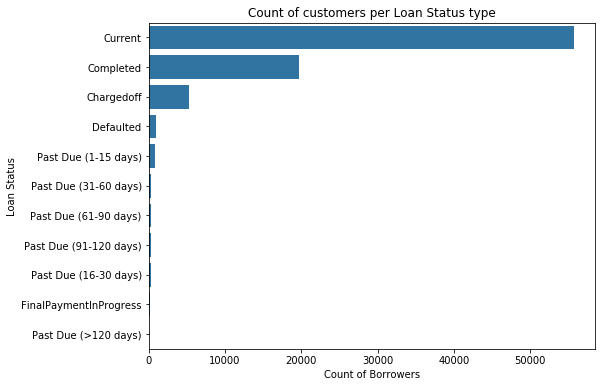

In [24]:
# Extract totals per loan status:
counts = loans_sub['LoanStatus'].value_counts()

# Plot the count of borrwers in the different loan status:
plt.figure(figsize=[8,6])
sb.barplot(counts, loans_sub['LoanStatus'].value_counts().index, color=base_color)
plt.xlabel('Count of Borrowers');
plt.ylabel('Loan Status');
plt.title('Count of customers per Loan Status type');
plt.show()

Clearly, there are many categories for the loan status. However, we can aggregate loans that are past due under one category and plot the new loan status.

In [25]:
# Use lambda function to lump all past due categories into one category, 'Past Due':
loans_sub['LoanStatus'] = loans_sub['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

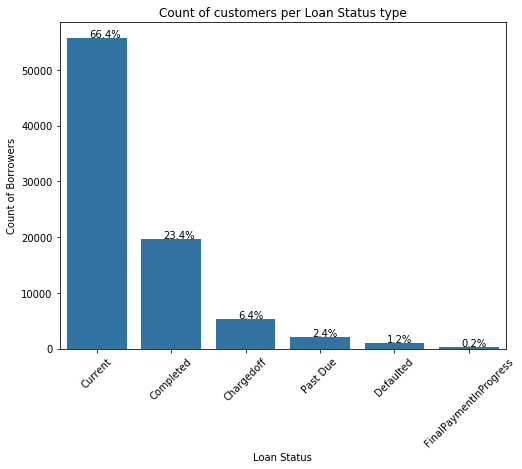

In [26]:
# Extract total count and counts per loan status:
n_counts = loans_sub['LoanStatus'].value_counts().sum()
counts = loans_sub['LoanStatus'].value_counts()

# Plot the count of borrwers in the different loan status:
plt.figure(figsize=[8,6])
sb.barplot(loans_sub['LoanStatus'].value_counts().index, counts, color=base_color)
plt.xticks(rotation=45);
plt.xlabel('Loan Status');
plt.ylabel('Count of Borrowers')
plt.title('Count of customers per Loan Status type');

# Use for loop to label each bar with its equivalent percentage:
for i in range(counts.shape[0]):
    count = counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_loans)
    plt.text(i-0.1,count+700, pct_string, va = 'center');

plt.show()

**Observations:**

The majority of the loans in the Prosper's loan book are paying well (i.e. either in the current status or completed status). All loans that were past due were aggregated into one category, 'Past Due' which constituted only 2.4% of the loan book. The remaining categories of loans comprised of loans that were either charged off or defaulted (7.5%).

### 6. What is the overall trend for loan applications through various months of the year?

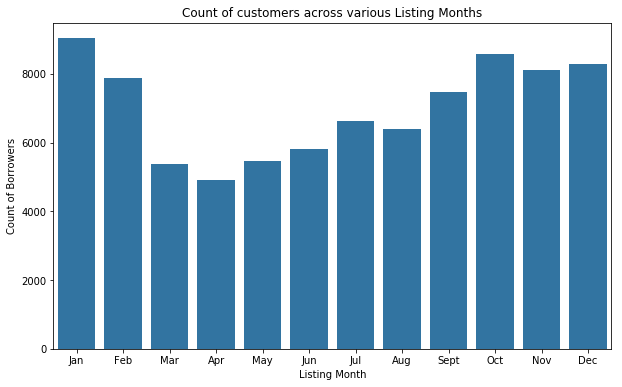

In [27]:
# Plot the count of borrowers in the different loan status:
plt.figure(figsize=[10,6])
sb.countplot(data = loans_sub, x='ListingMonth', color=base_color);
plt.xlabel('Listing Month');
plt.ylabel('Count of Borrowers');
plt.title('Count of customers across various Listing Months');

**Observations:**

Generally, most applications are made at the beginning of the year with the counts reducing towards April, when it's the lowest. Thereafter, the number of applications pick up incrementally up to the end of the year. Highest numbers of applications have been realized in the months of January and October. This relationship will be further investigated by considering the amounts of loans applied across the months.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
While performing univariate analysis on different variables, I noted the below:
- Majority of the loan customers' income ranges are within USD 25,000 and USD 75,000, with the modal range being USD 50,000 and USD 75,000.
- The prosper rating category with the most loans is C, at 21.6% of all loans. The least was those in grade AA, at 6.3%.
- Medium term loans are the most preferred, followed by long term loans. Short term loans are rarely taken by the borrowers.
- Majority of the borrowers stated monthly incomes of up to USD 20,000, with the highest number stating incomes of below USD 10,000.
- The majority of the loans in the Prosper's loan book are paying well (i.e. either in the current status or completed status). Here, I had to classify all the loans that were past due with varying days into one category, 'Past Due'.
- Most applications are made at the beginning of the year with the counts reducing towards April, when it's the lowest. Thereafter, the number of applications pick up incrementally up to the end of the year.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
In order to perform this univariate analysis, I had to perform the below data wrangling activities on the variables of interest:
- Conversion of the Income range variable to ordered categorical data type. This was critical in data visualization whereby the ranges had to be displayed in an increasing order.
- Convert Prosper rating categories to an ordered categorical data type, from the least risk with lowest return (AA) to the highest risk with highest return (HR). This enabled easy interpretation of the Prosper rating distributions.
- Due to the presence of multiple loan status categories, I combined all loans that were past due with varying days into one category. This ensured swift interpretation of the loan status plot.

Furthermore, the distribution of loans across the months indicated highest number of loan applications at the beginning and the end months of the year. This can be further investigated to see how this distribution varies in terms of the loan amounts disbursed during those months. This can be further be looked into in the Bivariate exploration.

## Bivariate Exploration
This section investigates relationships between pairs of variables in the Prosper Loans Dataset.

### 1. What is the trend of loan disbursements across different months?

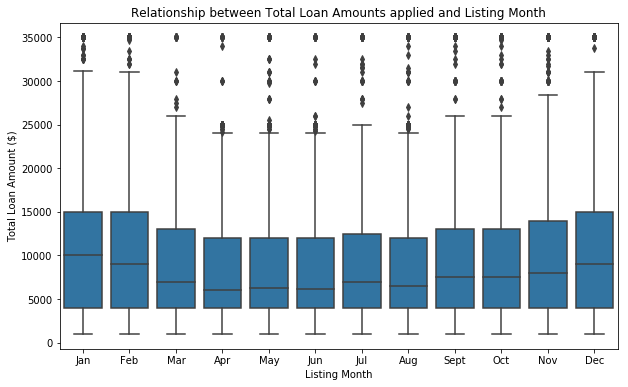

In [28]:
# Plot relationship between total loan amounts and the listing month:
plt.figure(figsize=[10,6])
ax = sb.boxplot(data=loans_sub, x='ListingMonth', y='LoanOriginalAmount', color=base_color);
plt.xlabel('Listing Month');
plt.ylabel('Total Loan Amount ($)');
plt.title('Relationship between Total Loan Amounts applied and Listing Month');
plt.show()

**Observations:**

The loan disbursements amounts are highest at the beginning and end of the year. Towards mid-year, the disbursement values decrease. However, there are distinct cases of high loan amounts applied depicted by the outliers on the box plots of the months between April and August.

### 2. Loan Purpose and their respective original amounts

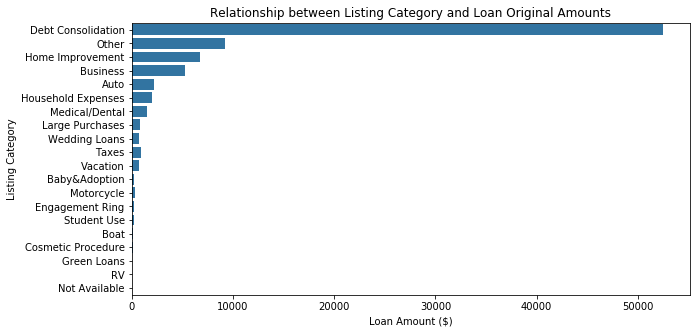

In [29]:
# Aggegate total loan amounts by listing category:
category_order = loans_sub.groupby(['ListingCategory']).sum().LoanOriginalAmount.sort_values(ascending=False).index

# Plot of the relationship between amounts applied and the listing month:
plt.figure(figsize=[10,5])
sb.countplot(data=loans_sub, y='ListingCategory', color=base_color, order = category_order)
plt.xlabel('Loan Amount ($)');
plt.ylabel('Listing Category');
plt.title('Relationship between Listing Category and Loan Original Amounts');

**Observations:**

Loan applications for the purpose of debt consolidation are the most popular. Other reasons for loan applications include 'other', home improvement and business, decreasing in that order. Also, a customer rarely fails to specify the loan reason. The least popular reasons include student use, engagement ring and baby & adoption.

### 3. What's the relationship among the various numeric variables in our dataset?

In [30]:
# Extract numerical variables:
numeric_vars = ['BorrowerAPR', 'BorrowerRate', 'DebtToIncomeRatio', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment', 'LoanOriginalAmount']

# Calculate the correlation among the numerical variables:
loans_sub[numeric_vars].corr()

,BorrowerAPR,BorrowerRate,DebtToIncomeRatio,StatedMonthlyIncome,MonthlyLoanPayment,LoanOriginalAmount
BorrowerAPR,1.000000,0.993319,0.117677,-0.093765,-0.321098,-0.426512
BorrowerRate,0.993319,1.000000,0.115566,-0.093330,-0.330972,-0.413589
DebtToIncomeRatio,0.117677,0.115566,1.000000,-0.082152,0.003308,-0.014002
StatedMonthlyIncome,-0.093765,-0.093330,-0.082152,1.000000,0.182270,0.182132
MonthlyLoanPayment,-0.321098,-0.330972,0.003308,0.182270,1.000000,0.916153
LoanOriginalAmount,-0.426512,-0.413589,-0.014002,0.182132,0.916153,1.000000


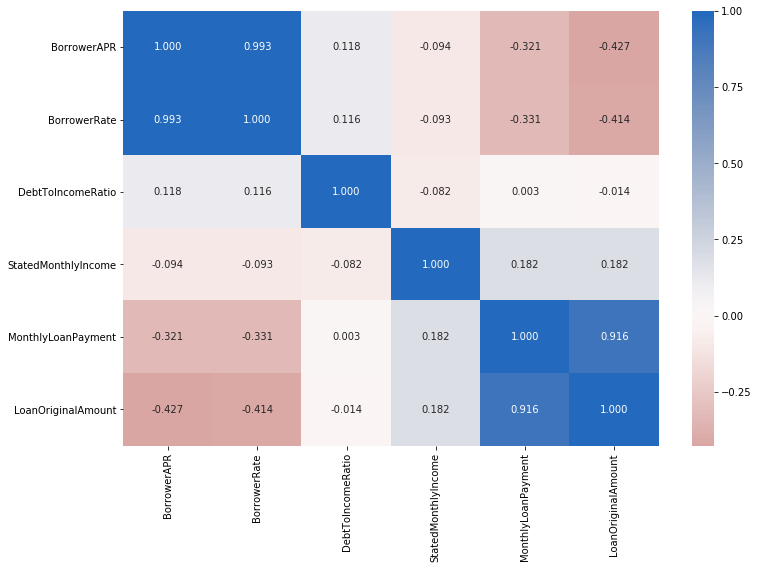

In [31]:
# Plot heat map to visualize the correlations:
plt.figure(figsize=[12,8])
sb.heatmap(loans_sub[numeric_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center=0)
plt.show()

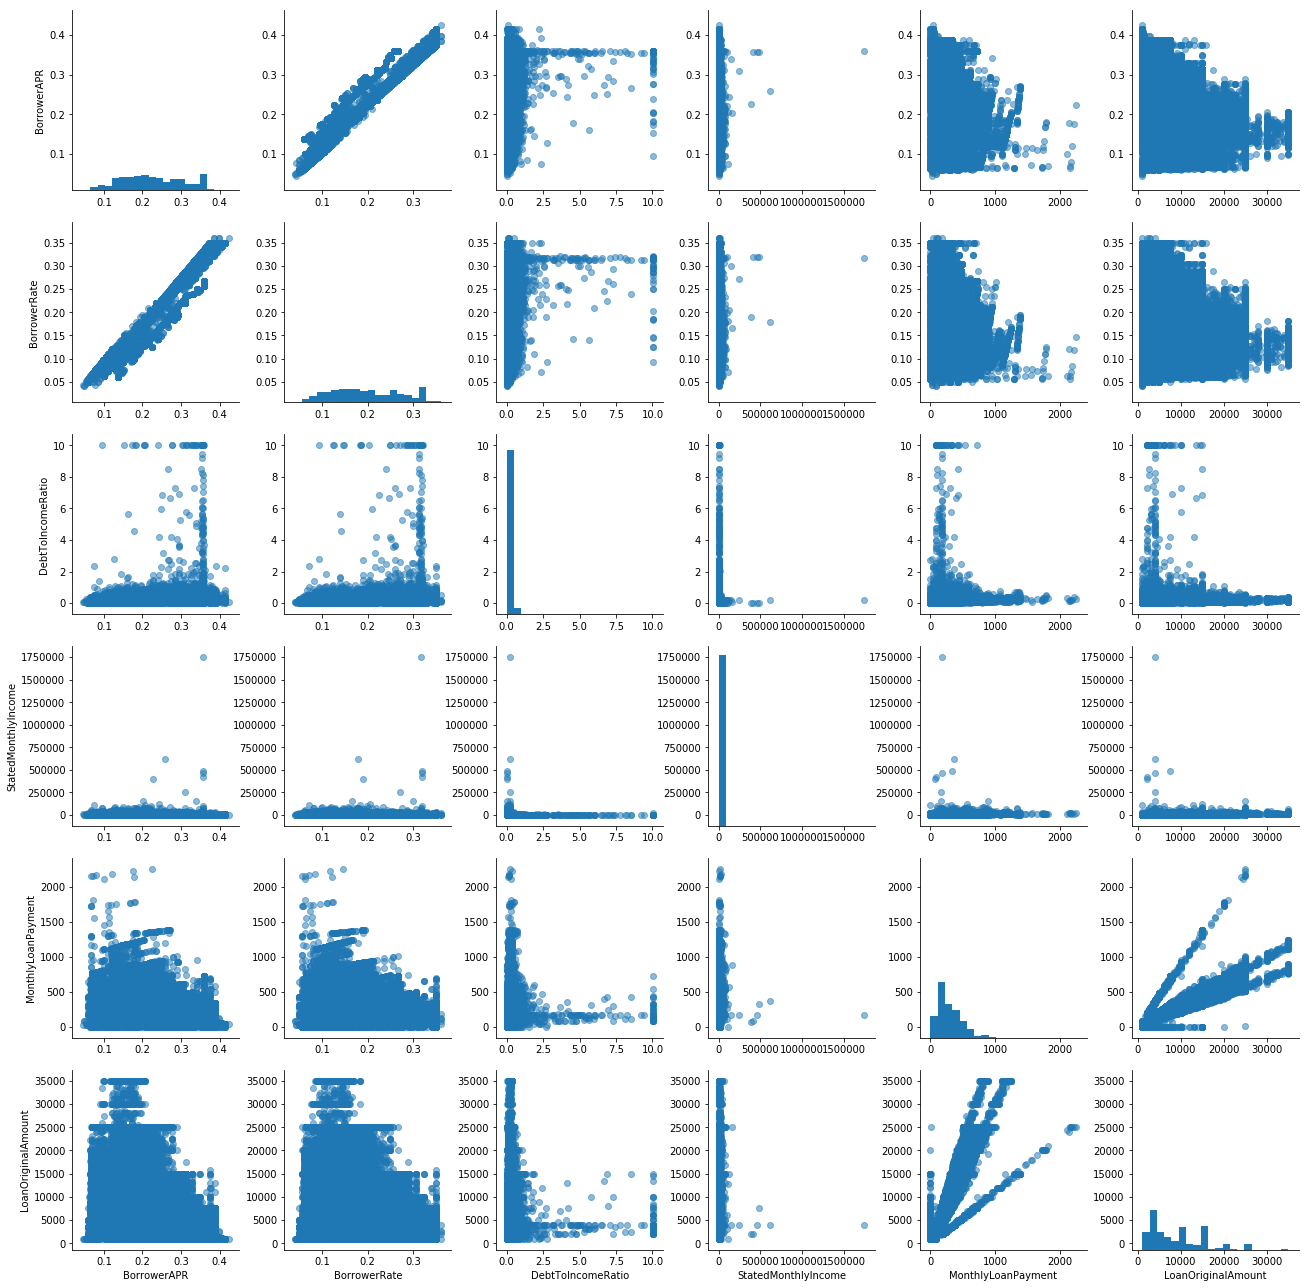

In [32]:
# plot matrix of a  sample 500 loans for a clearer quick plot:
samples = np.random.choice(loans_sub.shape[0], 500, replace=False)
diamonds_samp = loans_sub.reindex(samples)

g = sb.PairGrid(data=loans_sub, vars=numeric_vars, size=3)
g = g.map_diag(plt.hist, bins=20)
g.map_offdiag(plt.scatter, alpha=1/2);

**Observations:**

There is a strong relationship between borrower rate and borrower APR, also between monthly repayment and loan original amount. The relationships are expected since a higher interest rate is associated with a higher APR. Likewise, the more the original loan amount, the higher the repayment amount. Other variables do not display any significant relationship between the variables.

### 4. What is the relationship between borrower rate and the Prosper Rating?

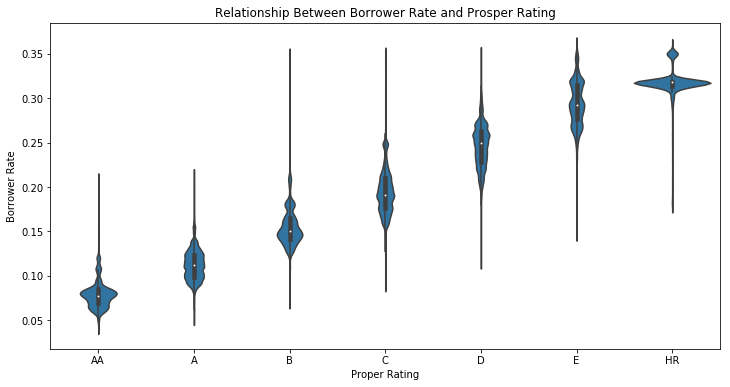

In [33]:
# Plot violin plots for borrower rate against Prosper ratings:
plt.figure(figsize=[12,6])
sb.violinplot(data=loans_sub, x='ProsperRating (Alpha)', y='BorrowerRate', color=base_color, size=8, aspect=6);
plt.xlabel('Proper Rating');
plt.ylabel('Borrower Rate');
plt.title('Relationship Between Borrower Rate and Prosper Rating');

**Observations:**

Loans that are rated as high risk (HR) have higher interest rate. The borrower rate decreases as the loan rating moves to lower risk categories. This implies a positive relationship between risk level and the borrower rate.

### 5. What is the relationship between Prosper Rating and borrower APR?

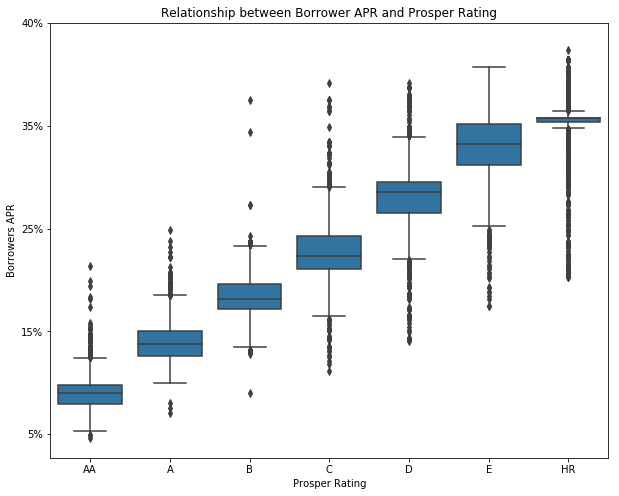

In [34]:
# Plot box plots borrower APR vs Prosper Ratings:
plt.figure(figsize=[10,8])
sb.boxplot(data=loans_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color = base_color)
plt.yticks(np.arange(0.05, 0.5, 0.1), ['5%', '15%', '25%', '35%', '40%'])
plt.xlabel('Prosper Rating');
plt.ylabel('Borrowers APR');
plt.title('Relationship between Borrower APR and Prosper Rating');

**Observations:**

Loans with good ratings (e.g. AA, A and B) attract lower borrower APR. In contrast, poorly rated loans (e.g. D, E and HR) have a higher borrower APR. This means that poorly rated loans are more expensive as compared to the loans with better ratings.

### 6. Borrower APR and Original Loan Amount comparison with some categorical variables

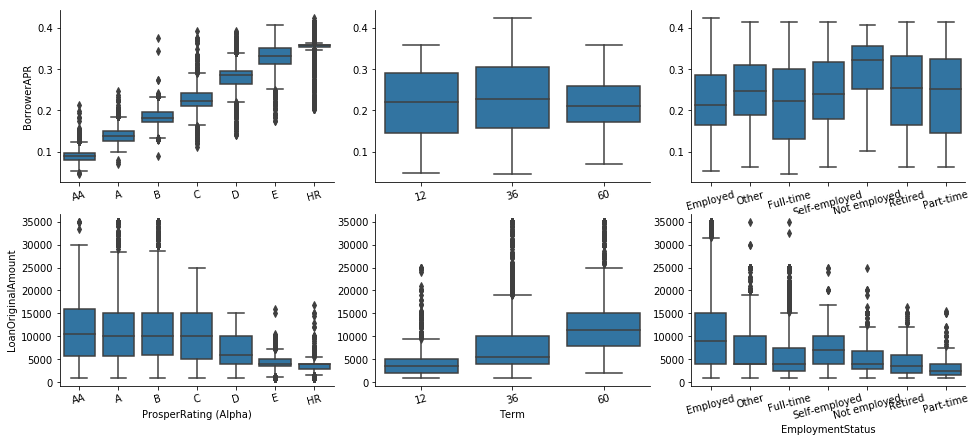

In [35]:
# Create a function that plots boxplots:
def boxgrid(x, y, **kwargs):
    """ A function for creating box plots with seaborn's PairGrid. """
    base_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = base_color);
    plt.xticks(rotation=15)

# Set figure size:
plt.figure(figsize = [15, 25])

# Plot box plots for the specific numeric variables against specific categorical variables:
g = sb.PairGrid(data = loans_sub, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], 
                x_vars = ['ProsperRating (Alpha)', 'Term', 'EmploymentStatus'], size = 3, aspect = 1.5);
g.map(boxgrid);
plt.show()

**Observations:**

The loans with good ratings have lower borrower APR, as those with poor rating having high APR. Also, loans with good rating are of higher total values whereas those with poor ratings are low in amounts. Long term loans (5 year) tend to be of higher amounts as compared to that of medium term (3 year), which has a higher total amount applied than short-term loans (1 year). The borrower APR ranges for the long term loans are close and relatively lower than short and medium term loans. Employed applicants tend to have lower APR and have the highest amounts borrowed relative to other statuses. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
The following relationships were observed from the bivariate explorations:
- Loan disbursement totals were generally high at the beginning and the end months of the year. This trend went low during the mid year months.
- The most popular loan reasons from the listing categories are debt consolidation, followed by other, home improvement and business. Least popular reasons include student use, engagement ring and baby & adoption.
- There is a strong relationship between borrower rate and borrower APR, also between monthly repayment and loan original amount. Other variables do not display any significant relationship between the variables.
- Loans that are rated as high risk (HR) have higher interest rate. The borrower rate decreases as the loan rating moves to lower risk categories.
- Loans with good ratings (e.g. AA, A and B) attract lower borrower APR. In contrast, poorly rated loans (e.g. D, E and HR) have a higher borrower APR.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
I observed that there was a very high number of customers applying loans in order to consolidate other loans. This means that most borrowers already have other existing loans and that such customers make the most of the applications. Prosper can make policies to better the terms for customers with existing loans to access more and with ease in order to grow the loan disbursements.

## Multivariate Exploration
Here, relationships among three or more variables in the Prosper Loans dataset are explored.

### 1. How is the Borrower Rate Trend for Homeowners and Non-Homeowners across the years?

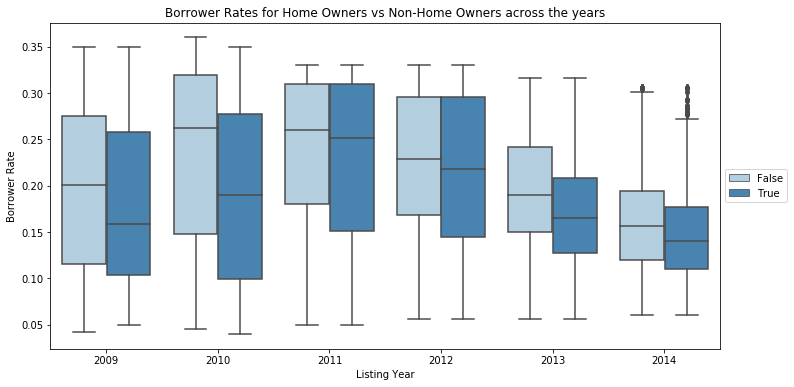

In [36]:
# Plot boxplots for borrower APR vs listing year for home/non-home owners:
plt.figure(figsize=[12,6])
sb.boxplot(data=loans_sub, x='ListingYear', y='BorrowerRate', hue='IsBorrowerHomeowner', palette='Blues')
plt.xlabel('Listing Year');
plt.ylabel('Borrower Rate');
plt.title('Borrower Rates for Home Owners vs Non-Home Owners across the years');
# legend to right of figure
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5))

**Observations:**

The borrower rate for non-home owners has always been higher than for the home owners since 2009. Generally, the spread of these rates for both categories has been declining with time. Also, the borrower rates have reduced significantly after 2012.

### 2. How does the Borrower rate vary with loan terms and Prosper Ratings?

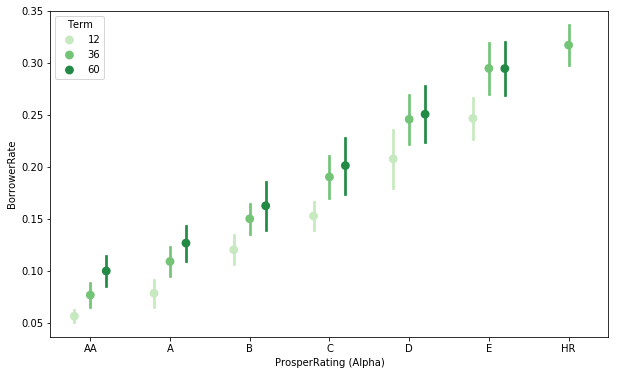

In [37]:
# Plot pointplot for borrower rate vs rating for different loan terms:
plt.figure(figsize=(10,6))
ax = sb.pointplot(data = loans_sub, x = 'ProsperRating (Alpha)', y = 'BorrowerRate', 
                  hue = 'Term', palette = 'Greens', linestyles = '', dodge = 0.4, ci = 'sd')

**Observations:**

The borrower rate generally is lower for best rated loans while it increases as the loan ratings deteriorates. Across most of the rating categories, borrower rate increases with the increasing loan term, except for worst rating (HR) whose only term is medium term (36 months).

### 3. Borrower APR and Loan Original Amount against Prosper Rating with Loan Term

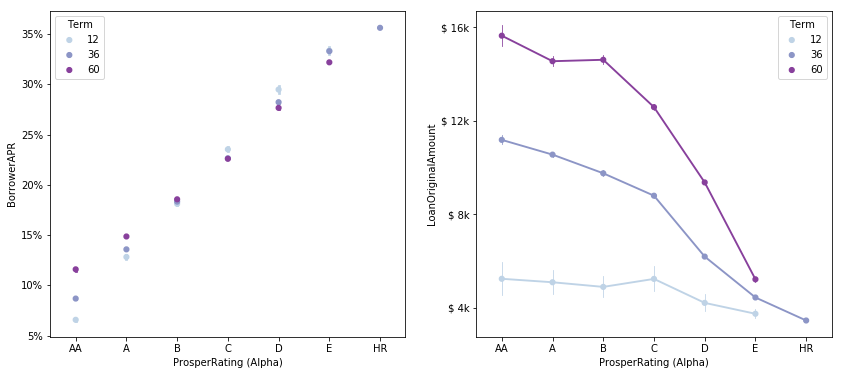

In [38]:
fig = plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 2)
sb.pointplot(data=loans_sub, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='Term', scale=.7, 
             errwidth=.8, palette='BuPu');
plt.yticks(np.arange(4000, 20000, 4000), ['$ 4k', '$ 8k', '$ 12k', '$ 16k', '$ 20k']);

plt.subplot(1, 2, 1)
sb.pointplot(data=loans_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term', scale=.7, linestyles='', palette='BuPu');
plt.yticks(np.arange(0.05, 0.4, 0.05), ['5%', '10%', '15%', '20%', '25%', '30%', '35%', '40%']);

**Observations:**

There seems to be a negative correlation between Prosper rating and the borrower APR. Loans with the best ratings (AA, A) have the least APR, whereas the loans with bad ratings (E, HR) have the most APR. This is a balance control that rewards the best loan customers and motivates the high risk customers. Also, there is a considerable difference in the APRs of the best rated loans (A, AA) whose short and medium term loans have the least APRs.

Customers with the best ratings are the most favorable borrowers of the long-term loans of higher amounts than the ones with poor ratings. This is still the case even for the medium- and short-term loans.

### 4. Borrower APR and Loan Status for various employment status

In [39]:
# Create list for the performing loans:
status_performing = ['Completed', 'Current', 'FinalPaymentInProgress']

# A function to categorize each loan into performing/non-performing type:
def status_cat (entry):
    '''A function to categorize loan status'''
    for status in status_performing:
        if status in entry:
            return 'Performing'
    return 'Non-performing'

# Apply status_cat function to classify loan status:
loans_sub['StatusCategory'] = loans_sub.LoanStatus.apply(lambda x: status_cat(x))

In [40]:
loans_sub.StatusCategory.value_counts()

Performing        75583
Non-performing     8398
Name: StatusCategory, dtype: int64

In [41]:
loans_sub.LoanStatus.value_counts()

Current                   55729
Completed                 19651
Chargedoff                 5336
Past Due                   2057
Defaulted                  1005
FinalPaymentInProgress      203
Name: LoanStatus, dtype: int64

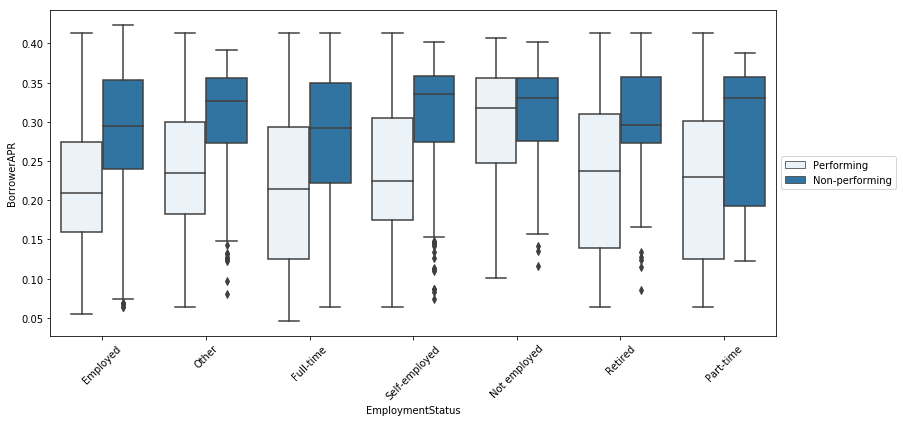

In [42]:
# Plot box plots of the borrower APR for the oerforming and non-performing loans per different employment status:
plt.figure(figsize=[13, 6])
sb.boxplot(data=loans_sub, x='EmploymentStatus', y='BorrowerAPR', hue='StatusCategory', dodge=0.3, color=base_color);
plt.xticks(rotation=45);
plt.legend(loc=6, bbox_to_anchor=(1.0,0.5));

**Observations:**

Customers whose loans status are complete, current or having final payment in progress are cheaper as they enjoy lower APR. Furthermore, employed, full-time, retired and part-time employees exhibit good performance on loans as compared to other employment statuses. Subsequently, these particular categories of employees enjoy cheaper loans with least APR.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
The multivariate exploration of the Prosper Loan data brought about the following observations:
- Analysis of the borrower rate for home owners and non-home owners with time indicated that the borrower rate for non-home owners has always been higher than for the home owners since 2009. Generally, the spread of these rates for both categories has been declining with time. Also, the borrower rates have reduced significantly after 2012.
- Low borrower APR is associated with loan status, whereby, the loans under the status of complete, current and final payment are cheaper. Also, customers under the status of employed, full-time, retired and part-time perform well and hence enjoy cheap loans with low borrower APR.

### Were there any interesting or surprising interactions between features?
One of the interesting interaction in the Prosper Loans dataset is the fact that across all the employment statuses, loans that are performing enjoy lower APR and hence are cheaper than those that are not performing. Also, the ranges for the borrower APR for full-time, retired and part-time employment statuses are wide, and additionally has loans that are serving with least APR for performing loans across all other employment statuses!

## Conclusions
The following are concluded from the Proper Loans Data analysis:

**Effects of the Prosper Loan Credit Ratings:**

Majority of the loans are under the rating of 'C' with the least number in 'HR' category. There seems to be a negative correlation between Prosper rating and the borrower APR. Loans with the best ratings (AA, A) have the least APR, whereas the loans with bad ratings (E, HR) have the most APR. This acts as a balance control to reward the best loan customers while motivating the high risk customers. Furthermore, loans that are rated as high risk (HR) have higher interest rate. The borrower rate decreases as the loan rating moves to lower risk categories. This implies a positive relationship between risk level and the borrower rate.

**Interaction of Borrower Rate and other features:**

The borrower rate generally is lower for best rated loans while it increases as the loan ratings deteriorates. Across most of the rating categories, borrower rate increases with the increasing loan term, except for worst rating (HR) whose only term is medium term (36 months). The borrower rate for non-home owners has always been higher than for the home owners since 2009. Overally, the spread of these rates for both categories has been declining with time. Also, the borrower rates have reduced significantly after 2012. Loans that are rated as high risk (HR) have higher interest rate. The borrower rate decreases as the loan rating moves to lower risk categories. This implies a positive relationship between risk level and the borrower rate.

**Loan Book Performance:**

Loan applications for the purpose of debt consolidation are the most popular. Other reasons for loan applications include 'other', home improvement and business, decreasing in that order. Also, a customer rarely fails to specify the loan reason. The least popular reasons include student use, engagement ring and baby & adoption. Generally, most applications are made at the beginning of the year with the counts reducing towards April, when it's the lowest. Thereafter, the number of applications pick up incrementally up to the end of the year. Highest numbers of applications have been realized in the months of January and October. Also, The majority of the loans in the Prosper's loan book are paying well (i.e. either in the current status or completed status). Additionally, medium term loans are the most preferred, followed by long term loans. Short term loans are rarely taken by the borrowers.